<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/4-2%20%ED%99%95%EB%A5%A0%EC%A0%81%20%EA%B2%BD%EC%82%AC%20%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

- 경사를 따라 내려가는 방법(가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표지만 조금씩 내려오는 것이 중요함).

- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 훈련함. 데이터가 매일매일 업데이트 되어도 학습을 계속 이어갈 수 있음(점진적 학습 or 온라인 학습).

- 하나의 샘플을 훈련 세트에서 무작위하게(확률적으로) 골라서 가장 가파른 경사를 찾음. 그다음 랜덤하게 또 다른 샘플 하나를 선택하여 경사를 조금 내려감. 전체 샘플을 모두 사용할 때까지 반복함.

  - 에포크(Epoch): 훈련 세트를 한 번 모두 사용하는 과정. 수십, 수백 번 이상 수행함.

- 모든 샘플을 사용했지만 경사를 다 내려오지 못했다면 다시 처음부터 시작함. 훈련 세트에 모든 샘플을 다시 채워 넣고 위 과정을 반복함.

- '신경망 알고리즘'에서 꼭 사용함. 신경망 알고리즘은 일반적으로 많은 데이터를 사용하기 때문에 한 번에 모든 데이터를 사용하기 어려움. 아울러 모델이 매우 복잡하기도 해서 수학적 방법으로 해답을 얻기 어려움.

- 미니배치 경사 하강법(Minibatch gradiant descent): 하나의 샘플이 아닌 무작위로 몇 개의 샘플을 선택해서 경사를 내려감. 실전과 신경망 알고리즘에서 많이 사용함.

- 배치 경사 하강법(Batch gradiant descent): 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용함. 전체 샘플을 사용하기에 가장 안정적인 방법일 수 있으나 컴퓨터 자원을 많이 사용함. 데이터가 지나치게 많으면 전체 데이터를 모두 읽지 못할 수도 있음.


## 점진적인 학습

### 손실 함수

- 손실 함수(loss function): 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준. 샘플 하나에 대한 손실을 정의함. 손실 함수 값이 작을수록 좋지만 어떤 값이 최솟값인지는 알지 못함. 만족할 만한 수준이면 경사를 다 내려왔다고 인정해야 함. 확률적 경사 하강법에 적절함.

- 비용 함수(cost function): 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 의미함. 보통 손실 함수와 구분하지 않고 섞어서 사용함.

- 분류에서 손실이란 정답을 못 맞히는 것임.

 e.g. 도미는 양성 클래스(1), 빙어는 음성 클래스(0)일 때,
 
   - 첫 번째 타깃은 1인데 1로 예측함(맞힘).
 
   - 두 번째 타깃은 1인데 0으로 예측함(틀림).
 
   - 세 번째 타깃은 0인데 0으로 예측함(맞힘).
 
   - 네 번째 타깃은 0인데 1로 예측함(틀림).
 
 4개 중 2개를 맞혔으니 정확도는 0.5임. 손실 함수는 정확도에 음수를 취하면 -1. 0은 가장 낮으며 -0.0은 가장 높음. 그러나 이렇게 4개의 샘플만 있다면 정확도는 0, 0.25, 0.5, 0.75, 1로 5개뿐이라서 경사 하강법을 활용하여 조금씩 움직일 수 없음. 경사가 좀 더 연속적일 필요가 있음. 아래 로지스틱 손실 함수란에서 추가로 예시를 듦.

- 기술적으로 손실 함수는 미분이 가능해야 함.

### 로지스틱 손실 함수

- '이진 크로스엔트로피 손실 함수(Binary cross-entropy loss function)'라고도 부름.

- 이 함수를 사용하면 로지스틱 회귀 모델이 만들어짐.

- 다중 분류의 경우 '크로스엔트로피 손실 함수(cross-entropy function)'를 사용함.

- 위 손실 함수란에서 문제점을 제시했듯, 경사가 연속적이려면 확률이 0 ~ 1 사이의 어떤 값도 될 수 있어야 함. 가령 위 e.g.에서 제시한 샘플 4개의 예측 확률을 0.9, 0.3, 0.2, 0.8이라고 가정하면..

 - 첫 번째 샘플의 예측 확률이 0.9이므로 양성 클래스의 타깃(1)과 곱한 후 음수로 바꿀 수 있음. 예측이 1에 가까울수록 좋은 모델이며 예측과 타깃의 곱의 음수는 점점 작아짐. 이 값을 손실 함수로 사용해도 좋음.
 
   - 0.9(예측) * 1(정답인 타깃) -> -0.9(낮은 손실)

 - 두 번째 샘플의 예측 확률이 0.3이므로 양성 클래스의 타깃(1)과 거리가 멂. 계산해보면 첫 번째 손실보다 높은 손실이 됨.

   - 0.3(예측) * 1(정답인 타깃) -> -0.3(높은 손실)

 - 세 번째 샘플의 예측 확률이 0.2인데, 음성 클래스의 타깃(0)이라서 그대로 곱하면 무조건 0이 되므로, 타깃을 양성 클래스의 타깃(1)처럼 바꿔서 예측값을 양성 클래스의 타깃(1)에 대한 예측으로 바꿈. 즉 1 - 0.2 = 0.8 로 사용함.

   - 0.8(예측) * 1(정답인 타깃) -> -0.8(낮은 손실)

 - 네 번째 샘플의 예측 확률이 0.8인데, 음성 클래스의 타깃(0)이라서 그대로 곱하면 무조건 0이 되므로, 타깃을 양성 클래스의 타깃(1)처럼 바꿔서 예측값을 양성 클래스의 타깃(1)에 대한 예측으로 바꿈. 즉 1 - 0.8 = 0.2 로 사용함.

   - 0.2(예측) * 1(정답인 타깃) -> -0.2(높은 손실)

 - 이 예측 확률들에 로그 함수를 적용하면, 예측 확률의 범위(0 ~ 1)에서 로그 함수는 음수가 되므로 최종 손실 값은 양수가 됨. 손실이 양수가 되면 이해하기 더 쉬움. 아울러 로그 함수는 0에 가까울수록 아주 큰 음수가 되므로 손실을 아주 크게 만들어서 모델에 큰 영향을 미칠 수 있음.

   - 타깃 = 1 일 때 -log(예측 확률)

      예측 확률이 1에서 멀어질수록 손실은 아주 큰 양수가 됨.

   - 타깃 = 0 일 때 -log(1 - 예측 확률)

      예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 됨.

- 회귀의 경우 손실 함수로 '평균 절댓값 오차'(타깃에서 예측을 뺀 절댓값을 모든 샘플에 평균한 값) 또는 '평균 제곱 오차'(타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값)를 사용함. 값이 작을수록 좋은 모델임.

## SGDClassifier

- '확률적 경사 하강법'을 제공하는 대표적인 분류용 클래스.

- `loss`: 손실 함수의 종류를 지정하는 매개변수. `log`는 '로지스틱 손실 함수'. 기본값은 `hinge`. 아래에서 '힌지 손실(hinge loss)'에 대하여 간략하게 설명함.

- `penalty`: 규제의 종류를 지정하는 매개변수. 기본값은 `l2`.

- `alpha`: 규제 강도를 지정하는 매개변수. 기본값은 0.0001.

- `max_iter`: 수행할 에포크 횟수를 지정하는 매개변수. 10이면 10회를 반복함.

- `tol`: 반복을 멈출 조건을 지정하는 매개변수. 기본값은 `0.001`.

- `n_iter_no_change`: 손실이 `tol`만큼 줄어들지 않으면 알고리즘이 중단되도록 에포크를 지정하는 매개변수. 기본값은 `5`.

- `SGDRegressor`: 확률적 경사 하강법을 사용한 회귀 모델을 만드는 클래스. `SGDClassifier` 클래스에서 사용하는 매개변수와 동일하게 사용함.

   - `loss`: 기본값은 제곱 오차를 나타내는 `squared_loss`.

### 데이터 준비

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(fish)

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
# 훈련 세트와 테스트 세트의 특성을 표준화 전처리 함.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input) # 반드시 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야 함.

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### SGDClassifier 클래스로 모델 훈련하기

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # 손실 함수를 '로지스틱 손실 함수'로 지정함.
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 'ConvergenceWarning' 경고가 뜨는 이유는 모델이 충분히 수렴하지 않았다는 의미임. `max_iter` 매개변수의 값을 늘려서 반복 횟수를 늘려줘야 함.

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
# 모델을 이어서 훈련할 때는 `partial_fit()` 메서드를 사용함. 호출할 때마다 1 에포크씩 이어서 훈련함.
sc.partial_fit(train_scaled, train_target, )
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 정확도가 향상됨.
# 'train_scaled'과 'train_target'을 한꺼번에 사용했으니 확률적 경사 하강법이 아닌 배치 경사 하강법으로 여길 수 있음.
# 그러나 `SGDClassifier` 클래스는 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행함.
# 즉 '미니배치 경사 하강법'이나 '배치 하강법'을 제공하지 않는 클래스임.

0.8151260504201681
0.825


### 에포크와 과대/과소적합

- 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습하고, 경사를 다 내려오기 전에 훈련을 마치는 셈임.

 (과소적합 된 모델이 될 가능성이 높음)

- 에포크 횟수가 많으면 모델이 훈련 세트를 완전히 학습하고, 경사를 많이 내려와서 훈련 세트에 잘 맞는 모델이 만들어짐.

 (과대적합 된 모델이 될 가능성이 높음)

   - 조기 종료(Early stopping): 무작정 에포크 횟수를 늘리는 것은 과대적합 된 모델이 될 가능성이 높으므로, 과대적합이 되기 전에 훈련을 멈추는 것을 의미함.

#### 적절한 에포크 찾고 조기 종료 하기

In [ ]:
# 적절한 에포크를 찾고자 그래프를 그릴 준비를 함.
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

# 훈련 세트와 테스트 세트에 대한 점수를 기록하고자 리스트 2개를 마련함.
train_score = []
test_score = []

# `partial_fit()` 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 `partial_fit()` 메서드에 있는 `classes` 매개변수에 전달해줘야 함.
# 이를 위해 'train_target'에 있는 생선 7개의 목록을 만듦.
# 아래는 `classes` 매개변수에 대한 설명임.

# classes: ndarray of shape (n_classes,), default=None
#     Classes across all calls to partial_fit.
# Can be obtained by via np.unique(y_all), where y_all is the
# target vector of the entire dataset.
# This argument is required for the first call to partial_fit
# and can be omitted in the subsequent calls.
# Note that y doesn't need to contain all labels in classes.
classes = np.unique(train_target) # `classes` 매개변수에 대한 설명대로 `np.unique()` 함수를 활용하여 생선 7개의 배열을 만듦.
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
for _ in range(1, 300) : # `_` 는 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도임. 0 ~ 299까지 반복 횟수를 임시로 저장하기 위함.
    sc.partial_fit(train_scaled, train_target, classes=classes) # 생선 7개의 배열을 `classes` 매개변수에 전달함.

    # 0 ~ 299번 반복해서 얻은 점수를 각 리스트에 전달함.
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

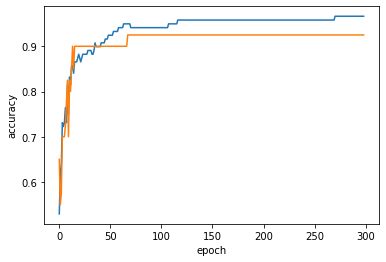

In [ ]:
# 각 리스트에 전달한 점수를 그래프로 그림.
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 백 번째 에포크 이후부터 훈련 세트와 테스트 테스의 점수가 점점 벌어지고 있음.
# 즉 훈련 세트와 테스트 세트 점수가 가장 가까운 에포크가 적절한 에포크임.

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
# `SGDClassifier`클래스는 일정 에포크 동안 성능이 향상되지 않으면 훈련을 자동으로 멈춤.
# `tol`: 반복을 멈출 조건을 지정하는 매개변수. 성능이 향상될 최솟값을 지정함.
# 여기선 멈출 조건을 없음(None)으로 지정하여 자동으로 멈추지 않고 `max_iter = 100`만큼 무조건 반복하도록 설정함.
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


### 힌지 손실

- `SGDClassifier` 클래스의 `loss` 매개변수의 기본값은 `hinge` 이며, 이는 '힌지 손실(hinge loss)'을 의미함.

   - 힌지 손실(hinge loss): '서포트 벡터 머신(support vector machine)' 머신러닝 알고리즘을 위한 손실 함수.

In [ ]:
# '힌지 손실'을 사용하여 같은 반복 횟수로 모델을 훈련함.
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
